サポートベクターマシン

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def gen_data():
    x0 = np.random.normal(size=50).reshape(-1, 2) - 2.
    x1 = np.random.normal(size=50).reshape(-1, 2) + 2.
    X_train = np.concatenate([x0, x1])
    ys_train = np.concatenate([np.zeros(25), np.ones(25)]).astype(np.int)
    return X_train, ys_train

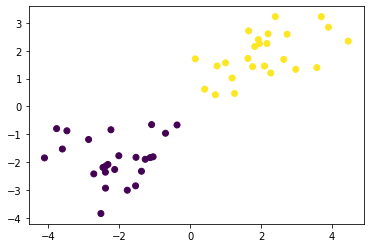

In [3]:
X_train, ys_train = gen_data()
plt.scatter(X_train[:, 0], X_train[:, 1], c=ys_train)

In [4]:
t = np.where(ys_train == 1.0, 1.0, -1.0)

n_samples = len(X_train)
# 線形カーネル
K = X_train.dot(X_train.T)

eta1 = 0.01
eta2 = 0.001
n_iter = 500

H = np.outer(t, t) * K

a = np.ones(n_samples)
for _ in range(n_iter):
    grad = 1 - H.dot(a)
    a += eta1 * grad
    a -= eta2 * a.dot(t) * t
    a = np.where(a > 0, a, 0)

In [5]:
index = a > 1e-6
support_vectors = X_train[index]
support_vector_t = t[index]
support_vector_a = a[index]

term2 = K[index][:, index].dot(support_vector_a * support_vector_t)
b = (support_vector_t - term2).mean()

In [6]:
xx0, xx1 = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
xx = np.array([xx0, xx1]).reshape(2, -1).T

X_test = xx
y_project = np.ones(len(X_test)) * b
for i in range(len(X_test)):
    for a, sv_t, sv in zip(support_vector_a, support_vector_t, support_vectors):
        y_project[i] += a * sv_t * sv.dot(X_test[i])
y_pred = np.sign(y_project)

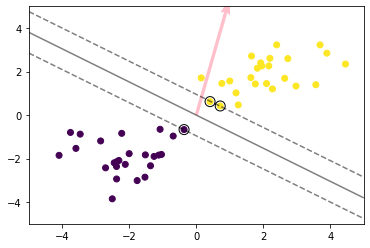

In [7]:
# 訓練データを可視化
plt.scatter(X_train[:, 0], X_train[:, 1], c=ys_train)
# サポートベクトルを可視化
plt.scatter(support_vectors[:, 0], support_vectors[:, 1],
                    s=100, facecolors='none', edgecolors='k')
# 領域を可視化
#plt.contourf(xx0, xx1, y_pred.reshape(100, 100), alpha=0.2, levels=np.linspace(0, 1, 3))
# マージンと決定境界を可視化
plt.contour(xx0, xx1, y_project.reshape(100, 100), colors='k',
                     levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])


# マージンと決定境界を可視化
plt.quiver(0, 0, 0.1, 0.35, width=0.01, scale=1, color='pink')

[[ 1.11776969 -0.05115649]
 [ 0.88444176  0.22376901]
 [ 1.15888142  0.618908  ]
 [ 0.62964419  0.97726699]
 [ 0.69850073  0.91319741]
 [ 0.39325109  0.8276764 ]
 [ 0.19230536  1.07628067]
 [-0.09676785  0.95384547]
 [-0.50808369  0.68753101]
 [-0.55499843  0.91209621]]


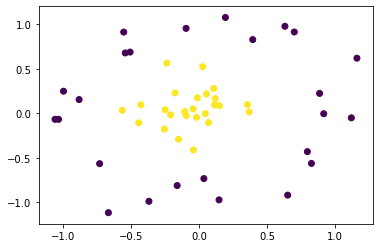

In [15]:
factor = .2
n_samples = 50
linspace = np.linspace(0, 2 * np.pi, n_samples // 2 + 1)[:-1]
outer_circ_x = np.cos(linspace)
outer_circ_y = np.sin(linspace)
inner_circ_x = outer_circ_x * factor
inner_circ_y = outer_circ_y * factor

X = np.vstack((np.append(outer_circ_x, inner_circ_x),
               np.append(outer_circ_y, inner_circ_y))).T
y = np.hstack([np.zeros(n_samples // 2, dtype=np.intp),
               np.ones(n_samples // 2, dtype=np.intp)])
X += np.random.normal(scale=0.15, size=X.shape)
x_train = X
y_train = y
plt.scatter(x_train[:,0], x_train[:,1], c=y_train)
print(x_train[:10])

In [37]:
from sklearn import svm

clf = svm.SVC(gamma="scale", C=10)
clf.fit(x_train, y_train)
clf.get_params()

{'C': 10,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

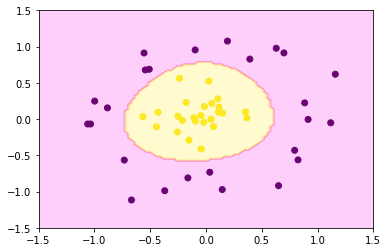

In [33]:
xx0, xx1 = np.meshgrid(np.linspace(-1.5, 1.5, 100), np.linspace(-1.5, 1.5, 100))
xx = np.array([xx0, xx1]).reshape(2, -1).T
pred = np.empty(len(xx), dtype=int)
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
plt.contourf(xx0, xx1, clf.predict(xx).reshape(100, 100), alpha=0.2, cmap='spring')